In [1]:
import pandas as pd

In [3]:
# https://www.kaggle.com/datasets/emreokcular/turkish-song-lyrics
df = pd.read_csv("turkish_song_lyrics.csv") 
df.head()

,singer,song,album,lyrics
0,Ahmet Kaya,"(Potbori) Fabrika Kızı, Cama Çıkma, Fabrika Önü",Şafak Türküsü,Bir mavi otobüs gelirdi\nSeni alır giderdi\nO ...
1,Ahmet Kaya,Acı Ninni,Baş Kaldırıyorum,"Uyusun ha iyi büyüsün,\nCamlar buğulanmasın\nS..."
2,Ahmet Kaya,Acılara Tutunmak,Acılara Tutunmak,Kavuşmak özgürlükse özgürdük ikimiz de\nElleri...
3,Ahmet Kaya,Ada Sahilleri,Hoşçakalın Gözüm,Ada sahillerinde bekliyorum\nHer zaman yolları...
4,Ahmet Kaya,Adı Bahtiyar,Dinle Sevgili Ülkem,"Geçiyor önümden, sirenler içinde\nAh eller üst..."


In [4]:
df["singer"].unique()

array(['Ahmet Kaya', 'Barış Manço', 'Büyük Ev Ablukada', 'Can Bonomo',
       'Candan Erçetin', 'Cem Adrian', 'Cem Karaca', 'Ceza', 'Duman',
       'Ezhel', 'Feridun Düzağaç', 'Kayahan', 'Mabel Matiz',
       'Mazhar Fuat Özkan (MFÖ)', 'Mor Ve Ötesi', 'Mustafa Sandal',
       'Müslüm Gürses', 'Nazan Öncel', 'Orhan Gencebay', 'Pinhani',
       'Sagopa Kajmer', 'Serdar Ortaç', 'Sertab Erener', 'Sezen Aksu',
       'Tarkan', 'Teoman', 'Yaşar', 'Yeni Türkü', 'Zeki Müren',
       'Zülfü Livaneli', 'Şebnem Ferah'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   singer  4975 non-null   object
 1   song    4975 non-null   object
 2   album   4074 non-null   object
 3   lyrics  4975 non-null   object
dtypes: object(4)
memory usage: 155.6+ KB


In [16]:
df.describe()

,singer,song,album,lyrics
count,4975,4975,4074,4975
unique,31,4613,669,4940
top,Zeki Müren,Sarıl Bana,Nostaljik Parçalar,"Killa;\nHangi bal hangi dal tadı başka tadı,\n..."
freq,500,5,165,3


In [7]:
df.isna().sum()

singer      0
song        0
album     901
lyrics      0
dtype: int64

In [15]:
df.groupby(["singer"])["song"].count().sort_values(ascending=False)

singer
Zeki Müren                 500
Müslüm Gürses              432
Sezen Aksu                 357
Sagopa Kajmer              321
Orhan Gencebay             295
Serdar Ortaç               243
Ahmet Kaya                 224
Ceza                       211
Barış Manço                157
Sertab Erener              156
Zülfü Livaneli             148
Cem Adrian                 140
Tarkan                     138
Candan Erçetin             137
Cem Karaca                 136
Kayahan                    124
Nazan Öncel                120
Mustafa Sandal             120
Feridun Düzağaç            107
Yaşar                      106
Mazhar Fuat Özkan (MFÖ)     99
Mor Ve Ötesi                97
Şebnem Ferah                97
Yeni Türkü                  95
Teoman                      85
Duman                       84
Mabel Matiz                 72
Pinhani                     68
Can Bonomo                  60
Ezhel                       23
Büyük Ev Ablukada           23
Name: song, dtype: int64

In [17]:
import matplotlib.pyplot as plt

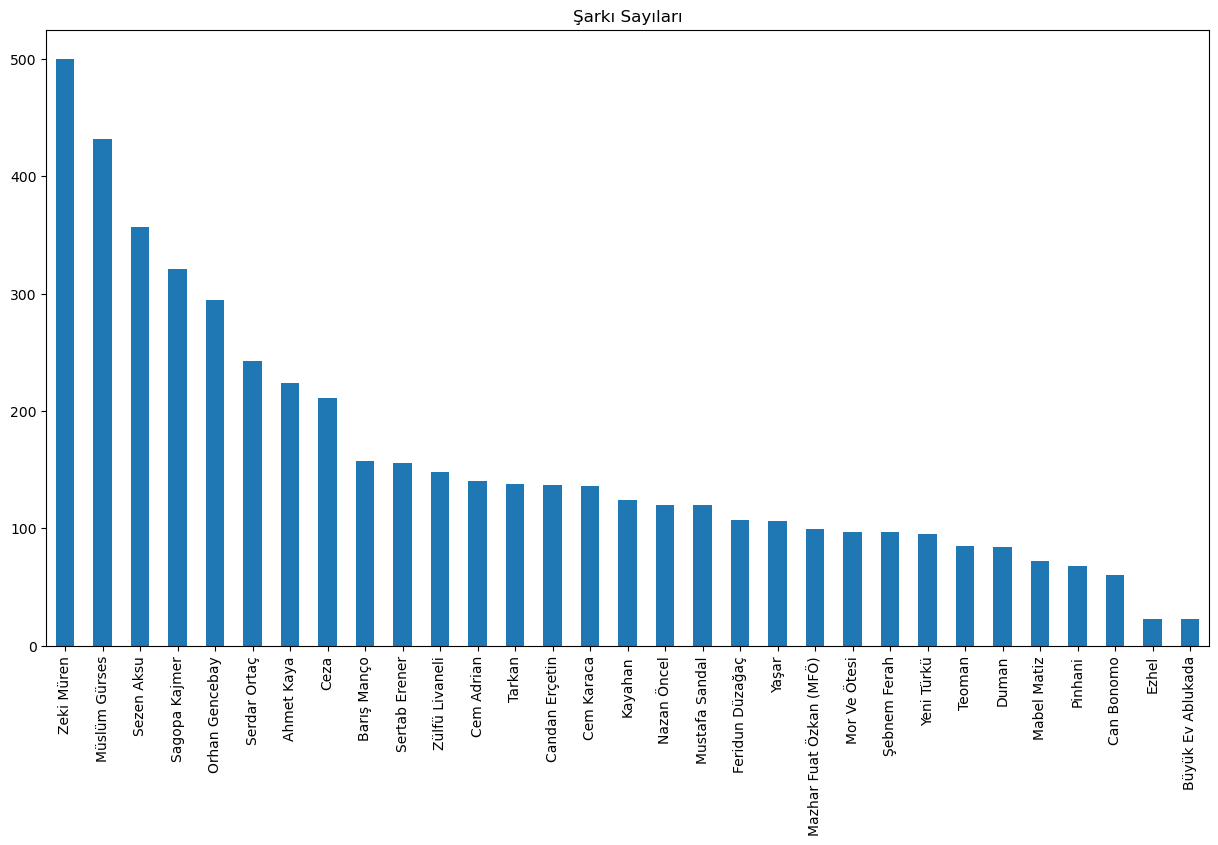

In [21]:
df.singer.value_counts().plot.bar(title="Şarkı Sayıları",figsize=(15,8))
plt.xticks(rotation=90)
plt.show()

In [54]:
songs = df.lyrics.str.lower().str.split("\n")
songs[:2]

0    [bir mavi otobüs gelirdi, seni alır giderdi, o...
1    [uyusun ha iyi büyüsün,, camlar buğulanmasın, ...
Name: lyrics, dtype: object

In [71]:
vocab = (" ".join(songs.sum())).split()
vocab[:10]

['bir',
 'mavi',
 'otobüs',
 'gelirdi',
 'seni',
 'alır',
 'giderdi',
 'o',
 'mavi',
 'otobüs']

In [72]:
word2index = {}
index2word = {}

word2index["<unk>"] = 0
word2index["<endl>"] = 1

index2word[0] = "<unk>"
index2word[1] = "<endl>"

i = 2
for word in vocab:
    if word in word2index:
        continue
    
    word2index[word] = i
    index2word[i] = word
    i += 1

In [76]:
len(word2index)

84825